In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
data = np.genfromtxt("ASTR19_F24_group_project_data.txt",
                     dtype = [('day', 'i8'),('time', 'U6'), ('height','f8')])

day = []
time = []
height = []

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])

In [4]:
timeint = []
hour = []
minute = []
for i in range(82):
    timeint.append(time[i].split(":"))
    hour.append(int(timeint[i][0]))
    minute.append(int(timeint[i][1]))

for i in range (82):
    day[i] = day[i] + (hour[i] + (minute[i]/60))/24

general line fit

In [5]:
def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

params, params_cov = optimize.curve_fit(f_line, day, height, sigma = [0.25] * len(data), p0 = [4.2, 0.3, -2, 2.3])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

y_fit = f_line(np.array(day), a_fit, b_fit, c_fit, d_fit)

high line fit

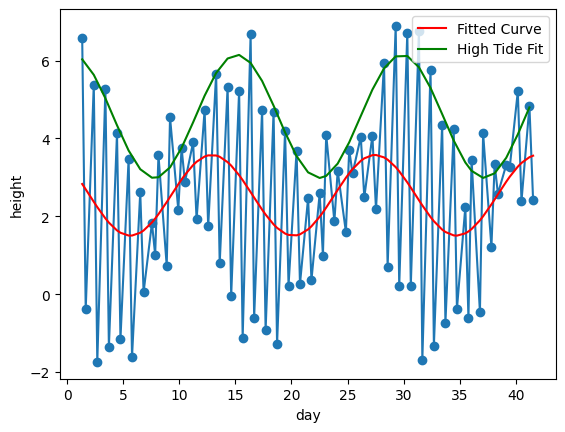

In [6]:
highs = []

for i in range(82):
    if i % 2 == 0:
        highs.append(height[i])

high_days = []

for i in range(82):
    if i % 2 == 0:
        high_days.append(day[i])

def f_line(x, u, v, w, z):
    return u * np.sin(v * x + w) + z
    
params, params_cov = optimize.curve_fit(f_line, high_days, highs, sigma = [0.25] * len(highs), p0 = [2, 0.5, -3, 4])

u_fit = params[0]
v_fit = params[1]
w_fit = params[2]
z_fit = params[3]

high_fit = f_line(np.array(high_days), u_fit, v_fit, w_fit, z_fit)

plt.plot(day,height, '-o')
plt.xlabel("day")
plt.ylabel("height")
plt.plot(day, y_fit, label = 'Fitted Curve', color = 'red')
plt.plot(high_days, high_fit, label = 'High Tide Fit', color = 'green')
plt.legend()
plt.show()

In [ ]:
# low line fit

In [14]:
lows = []
for i in range(82):
    if i % 2 == 1:
        lows.append(height[i])

low_days = []
for i in range(82):
    if i % 2 == 1:
        low_days.append(day[i])

def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

params, params_cov = optimize.curve_fit(f_line, low_days, lows, sigma = [0.25] * len(lows), p0 = [2, 0.5, -3, 4])

low_fit = f_line(np.array(low_days), params[0], params[1], params[2], params[3])

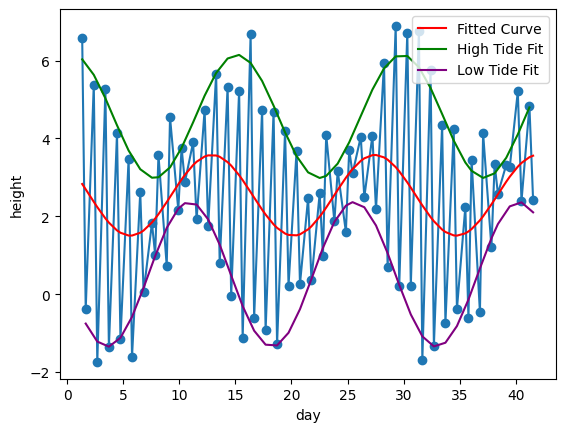

In [15]:
plt.plot(day,height, '-o')
plt.xlabel("day")
plt.ylabel("height")
plt.plot(day, y_fit, label = 'Fitted Curve', color = 'red')
plt.plot(high_days, high_fit, label = 'High Tide Fit', color = 'green')
plt.plot(low_days, low_fit, label = 'Low Tide Fit', color = 'purple')
plt.legend()
plt.show()